<a href="https://colab.research.google.com/github/Ameni-Mkaouar/maps/blob/main/GPNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install basemap


In [ ]:
pip install matplotlib-scalebar

In [55]:
#matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib_scalebar.scalebar import ScaleBar

In [69]:

# Define the bounding box of your site
site_min_lon = -76.56386
site_max_lon = -76.55705
site_min_lat = 38.8898
site_max_lat = 38.89534

# Define additional padding for the bounding box
padding = 0.001  # in degrees

# Define the bounding box of the map
map_min_lon = site_min_lon - padding
map_max_lon = site_max_lon + padding
map_min_lat = site_min_lat - padding
map_max_lat = site_max_lat + padding

points_lon = [-76.56359034, -76.5630765, -76.5625639, -76.56205213, -76.56154103, -76.56102805, -76.5605204, -76.56000743, -76.55949444, -76.55897849, -76.55846904, -76.55795486, -76.5574403]
points_lat = [38.89029403, 38.89061914, 38.8909441, 38.89126895, 38.89159372, 38.89191874, 38.89224309, 38.89256812, 38.89289318, 38.89321862, 38.89354325, 38.89386849, 38.8941938]

points_lon1 = [-76.56380422793757, -76.56278291224739, -76.56175997973192, -76.56124827658414, -76.55971173518311]
points_lat1 = [38.89283110848309 , 38.89218283797612 , 38.891533561826165, 38.89120872422706 , 38.89023309344401 ]
#x=[364393.5375531201 , 364438.72261872364, 364483.7991233341 ,
#       364528.8027084551 , 364573.7477762279 , 364618.85614871664,
#       364663.4997137665 , 364708.6063108732 , 364753.71454462   ,
#       364799.07984822703, 364843.8788590173 , 364889.0892785685 ,
#       364934.33259723   ]
#y= [4305764.368261977 , 4305799.684903475 , 4305834.986163437 ,
#       4305870.277503581 , 4305905.5612264145, 4305940.869917305 ,
#       4305976.11175672  , 4306011.422874107 , 4306046.735858271 ,
#       4306082.088266057 , 4306117.359544208 , 4306152.692981498 ,
#       4306188.0330519285]


http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/export?bbox=-8523161.22785828,4705755.620478006,-8522180.50314439,4706834.025283643&bboxSR=3857&imageSR=3857&size=1000,1099&dpi=100&format=png32&transparent=true&f=image


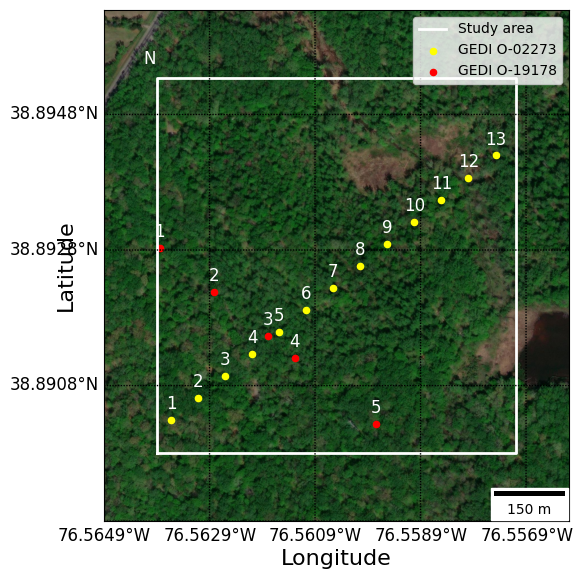

In [74]:
fig, ax = plt.subplots(figsize=(6, 8))
# Create a Basemap object with ESRI imagery
m = Basemap(ax=ax, projection='merc',
            llcrnrlon=map_min_lon, llcrnrlat=map_min_lat,
            urcrnrlon=map_max_lon, urcrnrlat=map_max_lat,
            resolution='i', epsg=3857)  # epsg=3857 for Web Mercator projection
# Add a ArcGIS background image.
m.arcgisimage(service='World_Imagery', xpixels=1000, dpi=100, verbose=True)

x_site, y_site = m([site_min_lon, site_max_lon, site_max_lon, site_min_lon, site_min_lon],
                   [site_min_lat, site_min_lat, site_max_lat, site_max_lat, site_min_lat])
ax.plot(x_site, y_site, marker=None, color='white', linewidth=2, label='Study area')


x, y = m(points_lon, points_lat)
ax.scatter(x, y, marker='o', color='yellow', label='GEDI O-02273', s=20)
# Annotate points from 1 to 13
for i, (px, py) in enumerate(zip(points_lon, points_lat), 1):
    ax.annotate(str(i), xy=m(px, py), xytext=(0, 5), textcoords='offset points', fontsize=12, color='white', ha='center', va='bottom')

x1, y1 = m(points_lon1, points_lat1)
ax.scatter(x1, y1, marker='o', color='red', label='GEDI O-19178', s=20)
# Annotate points from 1 to 5
for i, (px1, py1) in enumerate(zip(points_lon1, points_lat1), 1):
    ax.annotate(str(i), xy=m(px1, py1), xytext=(0, 5), textcoords='offset points', fontsize=12, color='white', ha='center', va='bottom')

# Add scale bar
scale_bar = ScaleBar(1, location='lower right')  # 1 pixel = 1 unit of whatever the coordinates are in
ax.add_artist(scale_bar)

# Add northing
northing_x, northing_y = m(site_min_lon, site_max_lat)
ax.annotate('N', xy=(northing_x, northing_y), xytext=(-10, 10),
            textcoords='offset points', fontsize=12, color='white')

# Add labels
ax.set_xlabel('Longitude', labelpad=20,  fontsize=16)
ax.set_ylabel('Latitude', labelpad=20,fontsize=16)

# Set the ticks using Basemap instance
lon_ticks = np.arange(map_min_lon, map_max_lon, 0.002)
lat_ticks = np.arange(map_min_lat, map_max_lat, 0.002)
m.drawparallels(lat_ticks, labels=[True, False, False, False], fontsize=12)
m.drawmeridians(lon_ticks, labels=[False, False, False, True], fontsize=12)
# Add legend
plt.legend(loc='upper right', fontsize=10)

# Save the plot as SVG file
plt.savefig('SERCmap_plot.svg', format='svg')

# Show the plot
plt.show()

NameError: name 'llcrnrlon' is not defined

In [30]:

print(m)

